<a href="https://colab.research.google.com/github/sushilrajeeva/Stock-Ticker-Analysis/blob/main/Analyze_Stock_Performance_for_Smarter_Investing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analyze Stock Performance for Smarter Investing


*   Sushil Rajeeva Bhandary














## All necessary python packages
*   Import yfinance library for Yahoo Finance API access
*   Import matplotlib's pyplot module for plotting
*   Importing matplotlib's dates module for date handling
*   Importing numpy for numerical computations





In [ ]:
# All the necessary imports
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

## Collecting input requirement from user
Collects user input for stock tickers, comparison preferences, and additional tickers for comparison.

def collect_user_input()

The script allows users to:


*   Retrieve historical stock data.
*   Perform moving average analysis and valuation assessment.
*   Compare stock performance against the S&P 500 or another user-specified stock.
*   Visualize stock prices and investment values over time.











## Fetching data from yfinance

def fetch_stock_data(ticker)


*   Fetches historical stock data for a specified ticker symbol over the past 10 years from Yahoo Finance.
*   Handles exceptions and prints an error message if data fetching fails.



## Calculating moving average

def calculate_moving_averages(data)

*   Calculates 50-day and 200-day moving averages.
*   Appends the calculated moving averages to the DataFrame.



## Stock Evaluation

def evaluate_stock_valuation(data)

*   Determines the current price, 50-day moving average, and 200-day moving average of the stock.
*   Prints these values and provides advice on stock valuation based on the relationships between the current price and moving averages.



## Plot the Evaluation Result

def plot_data(ticker, data)

*   Plots the historical stock prices, 50-day moving average, and 200-day moving average using matplotlib.
*   Creates a visualization illustrating the trends in stock prices over time.


## Calculate investmet values

def calculate_investment_value()

*   Calculates the value of an investment over time based on the historical stock data and the initial investment amount.
*   Computes the number of shares bought initially and tracks the investment value changes.



## Plot investment

def plot_investment_values(ticker, ticker_data, another_ticker_data, another_ticker="S&P500 (^GSPC)", investment_value=10000)

*   Plots investment values of the specified ticker against another ticker (default: S&P 500) over time.
*   Annotates the current investment values on the plot using matplotlib.



## Moving Average Trend

def plot_data_with_trendline(ticker, data)

*   Displays a matplotlib plot showing the historical stock prices, 50-day and 200-day moving averages, and a linear trend line representing the overall trend of the stock's prices over time.



##Main Function

*   Orchestrates the entire workflow by calling the above functions based on user inputs.
*   Collects user input, fetches stock data, performs analyses, and displays visualizations.


# Refactoring code snippets to a dedicated class

For the sake of simplicity and modularizing my project I am going put all the functions inside my class

Enter the stock ticker: tesla
tesla is an invalid stock ticker. Please enter a valid stock ticker.
Enter the stock ticker: tsla
Would you like to compare the performance of the ticker against S&P 500? (yes/no): tsla 
Invalid response. Please enter 'yes' or 'no'.
Would you like to compare the performance of the ticker against S&P 500? (yes/no): no
Would you like to add another ticker that you want to compare your ticker with? (yes/no): yes
Enter the other stock ticker: aap 
Invalid ticker. The ticker aap  you entered is invalid. Please enter a valid stock ticker.
Enter the other stock ticker: aapl
Would you like to add a specific amount to calculate the ticker performance over 10 years? (yes/no): yes
Enter the investment value (minimum 1 USD): 1000


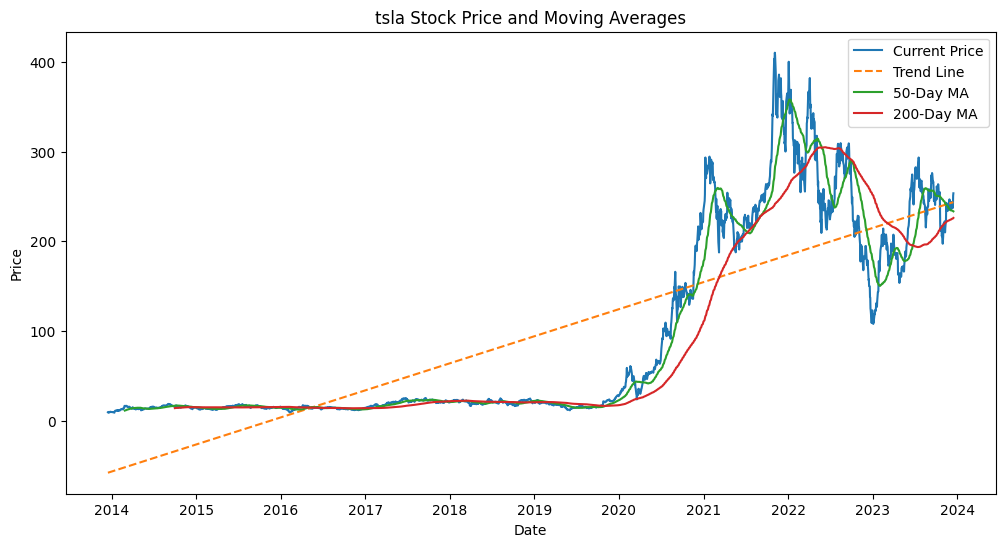

Current Price: $253.50 USD
Current 50 Day Moving Average: $233.40 USD
Current 200 Day Moving Average: $226.06 USD
The current price is overvalued, you should probably wait a little longer.


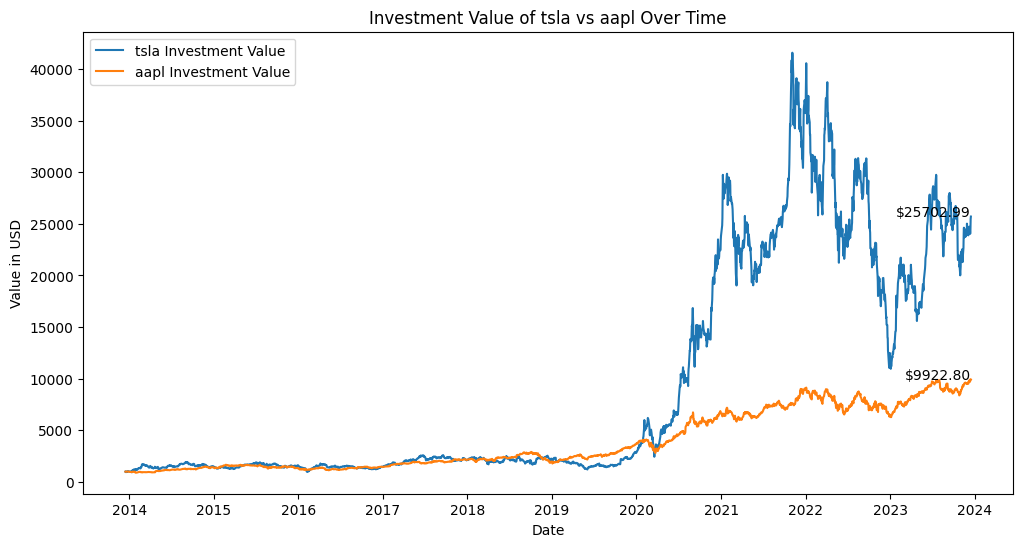

If invested $1000.0 in tsla 10 years ago, today's value would be: $25702.99 USD
If you invested $1000.0 in aapl 10 years ago, today's value would be: $9922.80 USD


In [ ]:
# Adding all important imports
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Creating StockAnalyzer Class
class StockAnalyzer:
  #Initializing the values
    def __init__(self):
        self.ticker = ''
        self.compare_snp = False
        self.another_ticker = ''
        self.investment_value = 10000

    # This function calculates user input
    def collect_user_input(self):
        # Collecting user input for the stock ticker
        while True:
          # Until user inputs a valid input this function will keep asking user for entering the stock ticker
            self.ticker = input("Enter the stock ticker: ")
            try:
              # The yfinance api will throw an error if an invalid ticker is given
              # we used it to our advantage by using it to check if it is a valid ticker or not, if it is invalid i am handling it below in except
                yf.Ticker(self.ticker).info
                break
            except:
                print(f"{self.ticker} is an invalid stock ticker. Please enter a valid stock ticker.")

        # Asking if the user wants to compare with S&P 500
        while True:
            self.compare_snp = input("Would you like to compare the performance of the ticker against S&P 500? (yes/no): ").lower()
            if self.compare_snp in ["yes", "no"]:
                break
            else:
                print("Invalid response. Please enter 'yes' or 'no'.")

        # If the user doesn't want to compare with S&P 500
        if self.compare_snp != 'yes':
            while True:
                add_ticker = input("Would you like to add another ticker that you want to compare your ticker with? (yes/no): ").lower()
                if add_ticker in ["yes", "no"]:
                    break
                else:
                    print("Invalid response. Please enter 'yes' or 'no'.")

            if add_ticker == 'yes':
                while True:
                    self.another_ticker = input("Enter the other stock ticker: ")

                    # Check if the entered ticker is different from the first one and if it's valid
                    if self.another_ticker.lower() == self.ticker.lower():
                        print("Please enter another ticker, it can't be the same as the first ticker.")
                    else:
                        try:
                            yf.Ticker(self.another_ticker).info
                            break  # Break out of the loop if the ticker is valid and different
                        except Exception:
                            print(f"Invalid ticker. The ticker {self.another_ticker} you entered is invalid. Please enter a valid stock ticker.")

        # Ask user if they want to enter a specific investment amount
        while True:
            custom_input = input("Would you like to add a specific amount to calculate the ticker performance over 10 years? (yes/no): ").lower()
            if custom_input in ["yes", "no"]:
                break
            else:
                print("Invalid response. Please enter 'yes' or 'no'.")

        # Allow user to enter a custom investment amount if they choose 'yes'
        if custom_input == 'yes':
            while True:
                try:
                    self.investment_value = float(input("Enter the investment value (minimum 1 USD): "))
                    if self.investment_value >= 1:
                        break
                    else:
                        print("Please enter a valid amount greater than or equal to 1.")
                except ValueError:
                    print("Invalid input. Please enter a numerical value.")

        return self.ticker, self.compare_snp, self.another_ticker, self.investment_value

# This function checks if the ticker is valid or not
    def is_valid_ticker(self, ticker):
        try:
            yf.Ticker(ticker).info
            return True
        except Exception:
            return False

# This function validates the secondary ticker inputed the user and also checks if the secondary ticker is not same as the first ticker
# if it is same as first ticker name then it validates to false
    def get_another_ticker(self):
        while True:
            another_ticker = input("Enter the other stock ticker: ")
            if another_ticker.lower() != self.ticker.lower() and self.is_valid_ticker(another_ticker):
                return another_ticker
            else:
                print("Please enter a different valid stock ticker.")

# This function gets the investment value from the user
    def get_investment_value(self):
        while True:
            try:
                investment_value = float(input("Enter the investment value (minimum 1 USD): "))
                if investment_value >= 1:
                    return investment_value
                else:
                    print("Please enter a valid amount greater than or equal to 1.")
            except ValueError:
                print("Invalid input. Please enter a numerical value.")


# This function calculates the moving averages (50 days and 200 days) given the finance data
    def calculate_moving_averages(self, data):
        data['50_MA'] = data['Close'].rolling(window=50).mean()
        data['200_MA'] = data['Close'].rolling(window=200).mean()
        return data

# This function fetches the stock data with respect to a given ticker
    def fetch_stock_data(self, ticker):
        try:
            data = yf.download(ticker, period='10y', progress=False)
            return data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
            return None

# This function evaluates the stock data by showing its current price, 50 days and 200 days moving average and then telling the user if it is undervalued, evenly valued or over valued
    def evaluate_stock_valuation(self, data):
      # iloc[-1] gets the last entry of the array
        current_price = data['Close'].iloc[-1]
        current_50_MA = data['50_MA'].iloc[-1]
        current_200_MA = data['200_MA'].iloc[-1]
        # Displaying current price and moving averages
        print(f"Current Price: ${current_price:.2f} USD")
        print(f"Current 50 Day Moving Average: ${current_50_MA:.2f} USD")
        print(f"Current 200 Day Moving Average: ${current_200_MA:.2f} USD")

        # Providing buying or waiting advice based on stock valuation
        if current_price < current_50_MA and current_price < current_200_MA:
            print("The current price is undervalued, it might be a good option to buy.")
        elif current_50_MA < current_price < current_200_MA:
            print("The current price is evenly valued.")
        else:
            print("The current price is overvalued, you should probably wait a little longer.")

# This function plots the graph of the ticker showing the price, 50 days and 200 days moving average
    def plot_data(self, ticker, data):
        plt.figure(figsize=(12, 6))
        plt.plot(data['Close'], label='Current Price')
        plt.plot(data['50_MA'], label='50-Day MA')
        plt.plot(data['200_MA'], label='200-Day MA')
        plt.title(f"{ticker} Stock Price and Moving Averages")
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# This function calculates the investment value of a share from 10 years ago
    def calculate_investment_value(self, data, initial_investment):
        initial_price = data['Close'].iloc[0]
        shares = initial_investment / initial_price
        data['Investment_Value'] = shares * data['Close']
        return data

# this function plots the investment values of ticker and another ticker and shows what would happen if we had invested a certian investment amount 10 years ago
    def plot_investment_values(self, ticker, ticker_data, another_ticker_data, another_ticker="S&P500", investment_value=10000):
        # Calculate current investment values
        current_value_ticker = ticker_data['Investment_Value'].iloc[-1]
        current_value_snp = another_ticker_data['Investment_Value'].iloc[-1]

        plt.figure(figsize=(12, 6))
        plt.plot(ticker_data['Investment_Value'], label=f'{ticker} Investment Value')
        plt.plot(another_ticker_data['Investment_Value'], label=f'{another_ticker} Investment Value')
        plt.title(f"Investment Value of {ticker} vs {another_ticker} Over Time")
        plt.xlabel('Date')
        plt.ylabel('Value in USD')
        plt.legend()

        # Annotating the current values on the plot
        plt.text(ticker_data.index[-1], current_value_ticker, f'${current_value_ticker:.2f}', ha='right')
        plt.text(another_ticker_data.index[-1], current_value_snp, f'${current_value_snp:.2f}', ha='right')

        plt.show()

        # Printing the current investment values
        print(f"If invested ${investment_value} in {ticker} 10 years ago, today's value would be: ${current_value_ticker:.2f} USD")
        print(f"If you invested ${investment_value} in {another_ticker} 10 years ago, today's value would be: ${current_value_snp:.2f} USD")

# This function plots the graph of the ticker showing the price, 50 days and 200 days moving average with trend line
    def plot_data_with_trendline(self, ticker, data):
        plt.figure(figsize=(12, 6))
        plt.plot(data['Close'], label='Current Price')

        # Convert Date index to numeric values for trend line calculation
        date_numeric = mdates.date2num(data.index.to_pydatetime())

        # Calculate and plot a linear (first degree) trend line
        # z is an array of the coefficients of the linear equation
        # Citation : https://medium.datadriveninvestor.com/super-simple-trend-lines-in-python-d61a06fca6cf
        z = np.polyfit(date_numeric, data['Close'], 1)
        p = np.poly1d(z)
        plt.plot(data.index, p(date_numeric), label='Trend Line', linestyle='--')

        plt.plot(data['50_MA'], label='50-Day MA')
        plt.plot(data['200_MA'], label='200-Day MA')
        plt.title(f"{ticker} Stock Price and Moving Averages")
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()


# defining the main funciton
def main():
    analyzer = StockAnalyzer()
    analyzer.collect_user_input()

    # Fetch historical stock data for the specified ticker
    stock_data = analyzer.fetch_stock_data(analyzer.ticker)
    if stock_data is None:
        print(f"Could not retrieve stock data for ticker {analyzer.ticker}.")
        return

    # Calculate moving averages and plot data with a trend line
    stock_data = analyzer.calculate_moving_averages(stock_data)
    analyzer.plot_data_with_trendline(analyzer.ticker, stock_data)

    # Evaluate stock valuation based on moving averages
    analyzer.evaluate_stock_valuation(stock_data)

    # Compare with S&P 500 or another specified ticker if requested
    if analyzer.compare_snp == 'yes':
        snp_data = analyzer.fetch_stock_data('^GSPC')
        if snp_data is not None:
            stock_data = analyzer.calculate_investment_value(stock_data, analyzer.investment_value)
            snp_data = analyzer.calculate_investment_value(snp_data, analyzer.investment_value)
            analyzer.plot_investment_values(analyzer.ticker, stock_data, snp_data, 'S&P 500 (^GSPC)', analyzer.investment_value)
        else:
            print("Could not retrieve S&P 500 data.")

    elif analyzer.another_ticker:
        another_ticker_data = analyzer.fetch_stock_data(analyzer.another_ticker)
        if another_ticker_data is not None:
            stock_data = analyzer.calculate_investment_value(stock_data, analyzer.investment_value)
            another_ticker_data = analyzer.calculate_investment_value(another_ticker_data, analyzer.investment_value)
            analyzer.plot_investment_values(analyzer.ticker, stock_data, another_ticker_data, analyzer.another_ticker, analyzer.investment_value)
        else:
            print(f"Could not retrieve data for ticker {analyzer.another_ticker}.")

if __name__ == "__main__":
    main()
